<a href="https://colab.research.google.com/github/soft-guy/python/blob/main/data_mining/graph_edit_distance/graph_edit_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph Edit Distance

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
# function for drawing a graph
# we use as labels attributes given by keys
def draw_graph(g):
  pos = nx.circular_layout(g)
  nx.draw_networkx_nodes(g, pos, node_color="yellow")
  nx.draw_networkx_labels(g, pos)
  nx.draw_networkx_edges(g, pos, edge_color="red")
  nx.draw_networkx_edge_labels(g, pos, font_color="green" )

In [3]:
# permutations of size n without repetitions
# we assume n <= len(list1)
def permutations_n_wr(list1, n):
  permutations = []
  if(n == 0):
    permutations.append([])
  else:
    for i in range(len(list1)):
      list_copy = copy.copy(list1)
      elem = list_copy.pop(i)
      for permutation in permutations_n_wr(list_copy, n - 1):
        permutations.append([elem] + permutation)
  return permutations

In [4]:
# graph edit distance function
def graph_edit_distance(g1, g2,\
                        node_ins_cost = 1.2,\
                        node_subst_cost = 1,\
                        node_del_cost = 1.1,\
                        edge_ins_cost = 1.1,\
                        edge_subst_cost = 1,\
                        edge_del_cost = 1.1):
  
  g1_nodes = list(g1.nodes)
  g2_nodes = list(g2.nodes)

  # find correspondence between nodes of graphs
  # we delete each node from g1 that doesn't have a pair
  # we add a node for each node from g2 that doesn't have a pair
  # thus if |V(g1)| > |V(g2)| we delete nodes
  # elif |V(g2)| > |V(g1)| we add nodes
  # we indicate that via 'mode' variable
  if(len(g1_nodes) >= len(g2_nodes)):
    permutations1 = permutations_n_wr(g1_nodes, len(g1_nodes))
    mode = 1
  else:
    mode = 2
    permutations1 = permutations_n_wr (g2_nodes, len(g2_nodes))

  min_cost = float("inf")
  if(mode == 1):
    for perm in permutations1:
      cost = 0
      for i in range (0, len(g2_nodes)):
        # if the corresponding nodes have different labels
        if(g1.nodes[perm[i]] != g2.nodes[g2_nodes[i]]):
          cost += node_subst_cost
        # delete edges for nodes we are going to delete
        # first the ones between nodes we keep and nodes we delete
        for j in range(len(g2_nodes), len(g1_nodes)):
          if(g1.has_edge(perm[i], perm[j])):
            cost += edge_del_cost
      # and now the edges between nodes we delete
      # note that we count those edges only once
      for k in range(len(g2_nodes), len(g1_nodes) - 1):
        for l in range(k + 1, len(g1_nodes)):
          if(g1.has_edge(perm[k], perm[l])):
            cost += edge_del_cost
      # now we can delete nodes
      cost += (len(g1_nodes) - len(g2_nodes)) * node_del_cost
      # now we update edges between the remaining nodes
      for i in range(len(g2_nodes) - 1):
        for j in range(i + 1, len(g2_nodes)):
          # first we add edges if there are edges in the target graph 
          # but there is no edge in the source graph
          # for corresponding pairs of edges
          if(g2.has_edge(g2_nodes[i], g2_nodes[j]) and (not g1.has_edge(perm[i], perm[j]))):
            cost += edge_ins_cost 
          # if there is an edge in the source but not in the target
          if((not g2.has_edge(g2_nodes[i], g2_nodes[j])) and g1.has_edge(perm[i], perm[j])):
            cost += edge_del_cost
          # if there are edges in both but labels are different
          if(g2.has_edge(g2_nodes[i], g2_nodes[j]) and g1.has_edge(perm[i], perm[j])\
            and g2[g2_nodes[i]][g2_nodes[j]] != g1[perm[i]][perm[j]]):
            cost += edge_subst_cost
      
      if(cost < min_cost):
        min_cost = cost

  elif(mode == 2):
    for perm in permutations1:
      cost = 0
      # add nodes
      cost += (len(g2_nodes) - len(g1_nodes)) * node_ins_cost
      for i in range(0, len(g1_nodes)):
        # if the corresponding nodes have different labels
        if(g2.nodes[perm[i]]["label"] != g1.nodes[g1_nodes[i]]["label"]):
          cost += node_subst_cost
        # add all required edges between the initial nodes and the nodes we added
        for j in range(len(g1_nodes), len(g2_nodes)):
          if(g2.has_edge(perm[i], perm[j])):
            cost += edge_ins_cost
      # add edges between new nodes
      for k in range(len(g1_nodes), len(g2_nodes) - 1):
        for l in range(k + 1, len(g2_nodes)):
          if(g2.has_edge(perm[k], perm[l])):
            cost += edge_ins_cost
      # now we update edges between the initial nodes
      for i in range(len(g1_nodes) - 1):
        for j in range(i + 1, len(g1_nodes)):
          # first we add edges if there are edges in the target graph 
          # but there is no edge in the source graph
          # for corresponding pairs of edges
          if(g2.has_edge(perm[i], perm[j]) and (not g1.has_edge(g1_nodes[i], g1_nodes[j]))):
            cost += edge_ins_cost 
          # if there is an edge in the source but not in the target
          if((not g2.has_edge(perm[i], perm[j])) and g1.has_edge(g1_nodes[i], g1_nodes[j])):
            cost += edge_del_cost
          # if there are edges in both but labels are different
          if(g2.has_edge(perm[i], perm[j]) and g1.has_edge(g1_nodes[i], g1_nodes[j])\
            and g2[perm[i]][perm[j]] != g1[g1_nodes[i]][g1_nodes[j]]):
            cost += edge_subst_cost
      
      if(cost < min_cost):
        min_cost = cost

  return min_cost

g_1 =


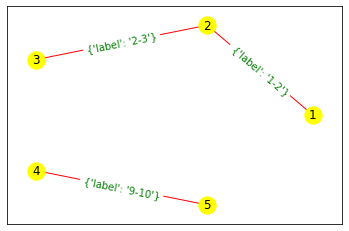

-----------------------------------------------------------------------
g_2 =


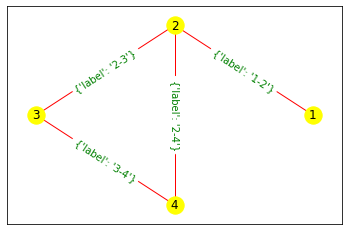

Graph edit distance between g1 and g2 according to my function 'graph_edit_distance' is equal to 5.4
Graph edit distance between g1 and g2 according to networkx is equal to 5.4
Graph edit distance between g2 and g1 according to my function 'graph_edit_distance' is equal to 5.5
Graph edit distance between g1 and g2 according to networkx is equal to 5.5


In [5]:
# two graphs g1 and g2
# we use key "label" for all the labels both for nodes and edges
g1 = nx.Graph()
g1.add_nodes_from([
  (1, {"label": "1"}),
  (2, {"label": "7"}),
  (3, {"label": "3"}),
])
g1.add_edges_from([
  (1, 2, {"label": "1-2"}),
  (2, 3, {"label": "2-3"}),
])
g2 = copy.deepcopy(g1)
g2.add_nodes_from([
  (4, {"label": "4"}),
])
g2.add_edges_from([
  (2, 4, {"label": "2-4"}),
  (3, 4, {"label": "3-4"}),  
])
g1.add_node(4, label="10")
g1.add_node(5, label="9")
g1.add_edge(4, 5, label="9-10")

print("g_1 =")
draw_graph(g1)
plt.show()
print("-----------------------------------------------------------------------")
print("g_2 =")
plt.clf()
draw_graph(g2)
plt.show()


# compare my functon and networkx.graph_edit_distance
print("Graph edit distance between g1 and g2 according to my function",\
      "'graph_edit_distance' is equal to", graph_edit_distance(g1, g2))
print("Graph edit distance between g1 and g2 according to networkx is equal to",\
      nx.graph_edit_distance(g1, g2,\
      node_subst_cost=lambda x, y: 1 if x != y else 0,\
      node_del_cost=lambda x: 1.1,\
      node_ins_cost=lambda x: 1.2,\
      edge_subst_cost=lambda x, y: 1 if x != y else 0,\
      edge_del_cost=lambda x: 1.1,\
      edge_ins_cost=lambda x: 1.1))
print("Graph edit distance between g2 and g1 according to my function",\
      "'graph_edit_distance' is equal to", graph_edit_distance(g2, g1))
print("Graph edit distance between g1 and g2 according to networkx is equal to",\
      nx.graph_edit_distance(g2, g1,\
      node_subst_cost=lambda x, y: 1 if x != y else 0,\
      node_del_cost=lambda x: 1.1,\
      node_ins_cost=lambda x: 1.2,\
      edge_subst_cost=lambda x, y: 1 if x != y else 0,\
      edge_del_cost=lambda x: 1.1,\
      edge_ins_cost=lambda x: 1.1))